<a href="https://colab.research.google.com/github/patrickaraujo/Colab/blob/main/T2_Classical_Techniques.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Task \#2**: Machine Learning MC886/MO444
##**Classical Machine Learning Techniques**##

In [ ]:
print('Patrick Anderson Matias de Araújo' + '\tR.A.: 217144')
print('Juliano Leonardo Soares' + '\tR.A.: 234597')

Patrick Anderson Matias de Araújo	R.A.: 217144
Juliano Leonardo Soares	R.A.: 234597


## Objective:

To explore **Linear Regression** and **Logistic Regression** alternatives and come up with the best possible model for the problems, at the same time avoiding overfitting (and also underfitting). In this work, we will train a model that use medical records from patients to predict patient survival.

## Dataset

The purpose of this dataset is to predict the patients' survival from medical records. These data is available in [Google Sheets](https://docs.google.com/spreadsheets/d/18-PlYBnwD7yJoyGJOsaB5Wydc2iTG9sSnbuuV4t4efE/edit?usp=sharing), consisting in 299 patients with heart failure collected in 2015. 

**Data Dictionary**:

- **AGE**: Age of the patient (years);

- **ANAEMIA**: Decrease of red blood cells or hemoglobin (boolean);

- **HIGH BLODD PRESSURE**: If the patient has hypertension (boolean);

- **CREATININE PHOSPHOKINASE (CPK)**: Level of the CPK enzyme in the blood (mcg/L);

- **DIABETES**: If the patient has diabetes (boolean);

- **EJECTION FRACTION**: Percentage of blood leaving the heart at each contraction (percentage);

- **PLATELETS**: Platelets in the blood (kiloplatelets/mL);

- **SEX**: Woman or man (binary);

- **SERUM CREATININE**: Level of serum creatinine in the blood (mg/dL);

- **SERUM SODIUM**: Level of serum sodium in the blood (mEq/L);

- **SMOKING**: If the patient smokes or not (boolean);

- **TIME**: Follow-up period (days);

- **DEATH EVENT**: If the patient deceased during the follow-up period (boolean);

More information about the dataset: *Chicco, D., Jurman, G. Machine learning can predict survival of patients with heart failure from serum creatinine and ejection fraction alone. BMC Med Inform Decis Mak 20, 16 (2020). https://doi.org/10.1186/s12911-020-1023-5*

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDRegressor
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler, normalize, PolynomialFeatures

df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/heart_dataset.csv').drop(columns=['time'])
df.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
4,NaN,Yes,160.0,Yes,20.0,0.0,327000.00,2.7,116.0,Male,No,1


### Analysis


(0.5 points) This part of the assignmente aims to analyze the dataset and preprocess the data for the models. To do so, a fews things to be considered: 


*   Are there any outliers?
*   Are there missing values?
*   How will you handle categorical variables?

In [ ]:
# TODO: Preprocessing Dataset.
df.describe()
#outliers

,age,creatinine_phosphokinase,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,DEATH_EVENT
count,295.000000,297.000000,297.000000,297.000000,296.000000,297.000000,298.000000,299.00000
mean,60.946895,584.801347,38.003367,0.353535,263387.475405,1.397542,136.620805,0.32107
std,11.896148,972.874154,11.805432,0.478874,98295.456485,1.036956,4.419177,0.46767
min,40.000000,23.000000,14.000000,0.000000,25100.000000,0.500000,113.000000,0.00000
25%,51.000000,118.000000,30.000000,0.000000,211750.000000,0.900000,134.000000,0.00000
50%,60.000000,250.000000,38.000000,0.000000,262000.000000,1.100000,137.000000,0.00000
75%,70.000000,582.000000,45.000000,1.000000,304000.000000,1.400000,140.000000,1.00000
max,95.000000,7861.000000,80.000000,1.000000,850000.000000,9.400000,148.000000,1.00000


*Yes. There are outliers*

In [ ]:
#missing values
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

age                         4
anaemia                     1
creatinine_phosphokinase    2
diabetes                    2
ejection_fraction           2
high_blood_pressure         2
platelets                   3
serum_creatinine            2
serum_sodium                1
sex                         5
dtype: int64

*Erasing rows with empty values*

In [ ]:
df = df.dropna()
pd.isnull(df).sum()[pd.isnull(df).sum() > 0]

Series([], dtype: int64)

*Yes. There are some missing values*

In [ ]:
df.dtypes
#object is categorical

age                         float64
anaemia                      object
creatinine_phosphokinase    float64
diabetes                     object
ejection_fraction           float64
high_blood_pressure         float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
sex                          object
smoking                      object
DEATH_EVENT                   int64
dtype: object

In [ ]:
df['high_blood_pressure'] = pd.Categorical(df.high_blood_pressure)
df['DEATH_EVENT'] = pd.Categorical(df.DEATH_EVENT)
df.dtypes
df_log = df.copy(deep=True)

<ipython-input-142-525e0537ac9b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['high_blood_pressure'] = pd.Categorical(df.high_blood_pressure)
<ipython-input-142-525e0537ac9b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['DEATH_EVENT'] = pd.Categorical(df.DEATH_EVENT)


In [ ]:
DataDummies = pd.get_dummies(df)
DataDummies

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_No,anaemia_Yes,diabetes_No,diabetes_Yes,high_blood_pressure_0.0,high_blood_pressure_1.0,sex_Female,sex_Male,smoking_No,smoking_Yes,DEATH_EVENT_0,DEATH_EVENT_1
0,75.0,582.0,20.0,265000.00,1.9,130.0,1,0,1,0,0,1,1,0,1,0,0,1
1,55.0,7861.0,38.0,263358.03,1.1,136.0,1,0,1,0,1,0,1,0,1,0,0,1
2,65.0,146.0,20.0,162000.00,1.3,129.0,1,0,1,0,1,0,1,0,0,1,0,1
3,50.0,111.0,20.0,210000.00,1.9,137.0,0,1,1,0,1,0,1,0,1,0,0,1
5,90.0,47.0,40.0,204000.00,2.1,132.0,0,1,1,0,0,1,1,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
287,45.0,582.0,55.0,543000.00,1.0,132.0,1,0,0,1,1,0,0,1,1,0,1,0
289,90.0,337.0,38.0,390000.00,0.9,144.0,0,1,1,0,1,0,0,1,1,0,1,0
290,45.0,615.0,55.0,222000.00,0.8,141.0,1,0,0,1,1,0,0,1,1,0,1,0
293,63.0,103.0,35.0,179000.00,0.9,136.0,0,1,0,1,1,0,1,0,0,1,1,0


In [ ]:
df_1 = DataDummies
df_1.rename(columns={'high_blood_pressure_0.0': 'high_blood_pressure_No', 'high_blood_pressure_1.0': 'high_blood_pressure_Yes', 'DEATH_EVENT_0': 'DEATH_EVENT_No', 'DEATH_EVENT_1': 'DEATH_EVENT_Yes'}, inplace=True)
df_1.dtypes

age                         float64
creatinine_phosphokinase    float64
ejection_fraction           float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
anaemia_No                    uint8
anaemia_Yes                   uint8
diabetes_No                   uint8
diabetes_Yes                  uint8
high_blood_pressure_No        uint8
high_blood_pressure_Yes       uint8
sex_Female                    uint8
sex_Male                      uint8
smoking_No                    uint8
smoking_Yes                   uint8
DEATH_EVENT_No                uint8
DEATH_EVENT_Yes               uint8
dtype: object

*Categorical variables were handle by using the function `pandas.get_dummies` that converts categorical variable into dummy/indicator variables*

## Linear Regression

(0.75 points) This part of the assigment aims to predict the level of serum creatinine in the blood based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: serum_creatinine**.

Obs: drop the DEATH_EVENT column.

In [ ]:
# TODO: Split data and normalize. You can use scikit-learn libraries.

temp = df_1.drop(columns = ['DEATH_EVENT_No', 'DEATH_EVENT_Yes'])

target = ['serum_creatinine']
y = temp[target]
train = temp[temp.columns.difference(target)]

# Get 60% of the dataset as the training set. Put the remaining 40% in temporary variables: x_ and y_.
x_train, x_VT, y_train, y_VT = train_test_split(train, y, test_size=0.40, random_state=1)

# Split the 40% subset above into two: one half for cross validation and the other for the test set
x_cv, x_test, y_cv, y_test = train_test_split(x_VT, y_VT, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_train.shape}")
print(f"the shape of the training set (target) is: {y_train.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_cv.shape}")
print(f"the shape of the cross validation set (target) is: {y_cv.shape}\n")
print(f"the shape of the test set (input) is: {x_test.shape}")
print(f"the shape of the test set (target) is: {y_test.shape}")

the shape of the training set (input) is: (166, 15)
the shape of the training set (target) is: (166, 1)

the shape of the cross validation set (input) is: (55, 15)
the shape of the cross validation set (target) is: (55, 1)

the shape of the test set (input) is: (56, 15)
the shape of the test set (target) is: (56, 1)


*Yes, we need to split the data into train, cross validation and test. In this case the spliting were conducted by using 60% of the original dataset for the training, 20% for the cross validation, and 20% for testing using the method `train_test_split` from `scikit-learn`.*

In [ ]:
x_train.describe()

,age,anaemia_No,anaemia_Yes,creatinine_phosphokinase,diabetes_No,diabetes_Yes,ejection_fraction,high_blood_pressure_No,high_blood_pressure_Yes,platelets,serum_sodium,sex_Female,sex_Male,smoking_No,smoking_Yes
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,60.479922,0.548193,0.451807,537.355422,0.572289,0.427711,37.861446,0.638554,0.361446,264508.411807,137.048193,0.662651,0.337349,0.638554,0.361446
std,11.009971,0.499178,0.499178,862.758803,0.496244,0.496244,12.350393,0.481873,0.481873,94377.393525,4.070302,0.474236,0.474236,0.481873,0.481873
min,40.000000,0.000000,0.000000,30.000000,0.000000,0.000000,15.000000,0.000000,0.000000,25100.000000,124.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,0.000000,0.000000,112.750000,0.000000,0.000000,30.000000,0.000000,0.000000,218000.000000,135.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,1.000000,0.000000,246.000000,1.000000,0.000000,36.500000,1.000000,0.000000,263358.030000,137.000000,1.000000,0.000000,1.000000,0.000000
75%,68.750000,1.000000,1.000000,582.000000,1.000000,1.000000,45.000000,1.000000,1.000000,308750.000000,140.000000,1.000000,1.000000,1.000000,1.000000
max,95.000000,1.000000,1.000000,7861.000000,1.000000,1.000000,70.000000,1.000000,1.000000,621000.000000,146.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_train.head(5)

,age,anaemia_No,anaemia_Yes,creatinine_phosphokinase,diabetes_No,diabetes_Yes,ejection_fraction,high_blood_pressure_No,high_blood_pressure_Yes,platelets,serum_sodium,sex_Female,sex_Male,smoking_No,smoking_Yes
61,50.0,1,0,318.0,1,0,40.0,0,1,216000.0,131.0,0,1,1,0
129,53.0,0,1,270.0,0,1,35.0,1,0,227000.0,145.0,1,0,1,0
175,60.0,0,1,95.0,1,0,60.0,1,0,337000.0,138.0,1,0,0,1
181,59.0,0,1,176.0,0,1,25.0,1,0,221000.0,136.0,1,0,0,1
172,70.0,0,1,171.0,1,0,60.0,0,1,176000.0,145.0,1,0,0,1


In [ ]:
def extractCol (list):
  col = []
  for column in list:
    if(list[column].dtype == "float64"):
      col.append(column)
  return col

In [ ]:
#train
scaler = StandardScaler()

col = extractCol(x_train)

x_train_N = x_train
x_train_N.loc[:, col] = scaler.fit_transform(x_train_N[col])

x_train_N.head(5)

,age,anaemia_No,anaemia_Yes,creatinine_phosphokinase,diabetes_No,diabetes_Yes,ejection_fraction,high_blood_pressure_No,high_blood_pressure_Yes,platelets,serum_sodium,sex_Female,sex_Male,smoking_No,smoking_Yes
61,-0.954737,1,0,-0.255018,1,0,0.173681,0,1,-0.515539,-1.490428,0,1,1,0
129,-0.681433,0,1,-0.310822,0,1,-0.232390,1,0,-0.398633,1.959527,1,0,1,0
175,-0.043722,0,1,-0.514273,1,0,1.797962,1,0,0.770427,0.234549,1,0,0,1
181,-0.134823,0,1,-0.420104,0,1,-1.044530,1,0,-0.462399,-0.258301,1,0,0,1
172,0.867294,0,1,-0.425917,1,0,1.797962,0,1,-0.940651,1.959527,1,0,0,1


In [ ]:
x_train_N.describe()

,age,anaemia_No,anaemia_Yes,creatinine_phosphokinase,diabetes_No,diabetes_Yes,ejection_fraction,high_blood_pressure_No,high_blood_pressure_Yes,platelets,serum_sodium,sex_Female,sex_Male,smoking_No,smoking_Yes
count,1.660000e+02,166.000000,166.000000,1.660000e+02,166.000000,166.000000,1.660000e+02,166.000000,166.000000,1.660000e+02,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,3.745331e-16,0.548193,0.451807,-3.678450e-17,0.572289,0.427711,-9.630850e-17,0.638554,0.361446,-1.016590e-16,1.615843e-15,0.662651,0.337349,0.638554,0.361446
std,1.003026e+00,0.499178,0.499178,1.003026e+00,0.496244,0.496244,1.003026e+00,0.481873,0.481873,1.003026e+00,1.003026e+00,0.474236,0.474236,0.481873,0.481873
min,-1.865753e+00,0.000000,0.000000,-5.898410e-01,0.000000,0.000000,-1.856671e+00,0.000000,0.000000,-2.544389e+00,-3.215406e+00,0.000000,0.000000,0.000000,0.000000
25%,-7.725342e-01,0.000000,0.000000,-4.936376e-01,0.000000,0.000000,-6.384600e-01,0.000000,0.000000,-4.942829e-01,-5.047267e-01,0.000000,0.000000,0.000000,0.000000
50%,-4.372162e-02,1.000000,0.000000,-3.387238e-01,1.000000,0.000000,-1.105686e-01,1.000000,0.000000,-1.222605e-02,-1.187592e-02,1.000000,0.000000,1.000000,0.000000
75%,7.534172e-01,1.000000,1.000000,5.190287e-02,1.000000,1.000000,5.797511e-01,1.000000,1.000000,4.701915e-01,7.274002e-01,1.000000,1.000000,1.000000,1.000000
max,3.144834e+00,1.000000,1.000000,8.514319e+00,1.000000,1.000000,2.610103e+00,1.000000,1.000000,3.788728e+00,2.205952e+00,1.000000,1.000000,1.000000,1.000000


In [ ]:
#cv

x_cv_N = x_cv
x_cv_N.loc[:, col] = scaler.transform(x_cv_N[col])

In [ ]:
#test

x_test_N = x_test
x_test_N.loc[:, col] = scaler.transform(x_test_N[col])

*Yes we need to normalize the data. Normalization should be applied separately to the train, validation, and test sets. It is important to calculate the normalization parameters (e.g., the minimum and maximum values for min-max scaling or the mean and standard deviation for z-score normalization that was used in this case throgh the `StandardScaler` technique using only the training set, and then apply these same parameters to the validation and test sets. This helps to prevent information from the validation and test sets leaking into the training set, which can result in overfitting.*

### Activities

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_regression](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_regression.html) to check the importance of each feature. 

> *   Do we need all the features to predict the target value?
> *   What happens if we drop the low correlation features?

In [ ]:
from sklearn.feature_selection import mutual_info_regression

# TODO: Feature selection.

mi_scores = mutual_info_regression(x_train_N, y_train)

mi_dict = {feature: mi_score for feature, mi_score in zip(x_train_N.columns, mi_scores)}

sorted_mi_dict = dict(sorted(mi_dict.items(), key=lambda item: item[1], reverse=True))

for feature, mi_score in sorted_mi_dict.items():
    print(f"{feature}: {mi_score}")

serum_sodium: 0.08682536091181436
ejection_fraction: 0.0841694611953625
high_blood_pressure_Yes: 0.02590028643639153
sex_Female: 0.01718368752532795
diabetes_Yes: 0.007762270520525583
sex_Male: 0.006077060826151337
diabetes_No: 0.0047129241077710216
high_blood_pressure_No: 0.0031851757403509318
age: 0.0
anaemia_No: 0.0
anaemia_Yes: 0.0
creatinine_phosphokinase: 0.0
platelets: 0.0
smoking_No: 0.0
smoking_Yes: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
x_train_N = x_train_N.drop('age', axis=1)
x_train_N = x_train_N.drop('creatinine_phosphokinase', axis=1)
x_train_N = x_train_N.drop('platelets', axis=1)
x_train_N = x_train_N.drop('anaemia_No', axis=1)
x_train_N = x_train_N.drop('anaemia_Yes', axis=1)
x_train_N = x_train_N.drop('high_blood_pressure_No', axis=1)
x_train_N = x_train_N.drop('high_blood_pressure_Yes', axis=1)

x_cv_N = x_cv_N.drop('age', axis=1)
x_cv_N = x_cv_N.drop('creatinine_phosphokinase', axis=1)
x_cv_N = x_cv_N.drop('platelets', axis=1)
x_cv_N = x_cv_N.drop('anaemia_No', axis=1)
x_cv_N = x_cv_N.drop('anaemia_Yes', axis=1)
x_cv_N = x_cv_N.drop('high_blood_pressure_No', axis=1)
x_cv_N = x_cv_N.drop('high_blood_pressure_Yes', axis=1)

x_test_N = x_test_N.drop('age', axis=1)
x_test_N = x_test_N.drop('creatinine_phosphokinase', axis=1)
x_test_N = x_test_N.drop('platelets', axis=1)
x_test_N = x_test_N.drop('anaemia_No', axis=1)
x_test_N = x_test_N.drop('anaemia_Yes', axis=1)
x_test_N = x_test_N.drop('high_blood_pressure_No', axis=1)
x_test_N = x_test_N.drop('high_blood_pressure_Yes', axis=1)

x_train_N.describe()

,diabetes_No,diabetes_Yes,ejection_fraction,serum_sodium,sex_Female,sex_Male,smoking_No,smoking_Yes
count,166.000000,166.000000,1.660000e+02,1.660000e+02,166.000000,166.000000,166.000000,166.000000
mean,0.572289,0.427711,-9.630850e-17,1.615843e-15,0.662651,0.337349,0.638554,0.361446
std,0.496244,0.496244,1.003026e+00,1.003026e+00,0.474236,0.474236,0.481873,0.481873
min,0.000000,0.000000,-1.856671e+00,-3.215406e+00,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,-6.384600e-01,-5.047267e-01,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.000000,-1.105686e-01,-1.187592e-02,1.000000,0.000000,1.000000,0.000000
75%,1.000000,1.000000,5.797511e-01,7.274002e-01,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,2.610103e+00,2.205952e+00,1.000000,1.000000,1.000000,1.000000


> What are the conclusions? (1-2 paragraphs)



Do we need all the features to predict the target value?
*No, we do not need all of them.*

What happens if we drop the low correlation features?

*The following are the list of features with the first item in the list representing the feature of least relevance to the output value and the last item representing the most relevant feature: '`platelets`', '`creatinine_phosphokinase`', '`anaemia`', '`age`', '`high_blood_pressure`', '`diabetes`', '`ejection_fraction`', '`smoking`', '`serum_sodium`', and '`sex`'. The features '`age`', '`anaemia`', '`creatinine_phosphokinase`', and '`platelets`' has zero (0) as value in respect to the correlation.*

*Dropping low correlation features improve the predictive performance of a model, as it can reduce noise and improve the model's ability to generalize. But dropping features may lead to a loss of important information and result in worse performance if not done with proper care.*

2. (2.0 points) Perform Linear Regression. You should implement your solution and compare it with ```sklearn.linear_model.SGDRegressor``` (linear model fitted by minimizing a regularized empirical loss with SGD, http://scikit-learn.org).

# *Gradient Descent (Homemade)*

In [ ]:
import copy, math

In [ ]:
# TODO: MSE Loss. You cannot use scikit-learn!!

def compute_cost(X, y, w, b):
    m = X.shape[0]
    cost = 0.0
    for i in range(m):
        f_wb_i = np.dot(X[i], w) + b
        cost = cost + (f_wb_i - y[i])**2
    cost = cost / (2 * m)
    return cost

In [ ]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!

In [ ]:
def compute_gradient(X, y, w, b):
    m,n = X.shape

    dj_dw = np.zeros((n,))

    dj_db = 0.

    for i in range(m):
        err = (np.dot(X[i], w) + b) - y[i]
        for j in range(n):         
            dj_dw[j] = dj_dw[j] + err * X[i, j]
        dj_db = dj_db + err    
    dj_dw = dj_dw / m
    dj_db = dj_db / m

    return dj_db, dj_dw

In [ ]:
# TODO: Linear Regression. Implement yout solution. You cannot use scikit-learn, Keras/TensorFlow, or PyTorch libraries!!
def gradient_descent(X, y, w_in, b_in, cost_function, gradient_function, alpha, num_iters):

    J_history = []
    w = copy.deepcopy(w_in)
    b = b_in

    for i in range(num_iters):

        dj_db,dj_dw = gradient_function(X, y, w, b)

        w = w - alpha * dj_dw
        b = b - alpha * dj_db

        if i<100000:
            J_history.append( cost_function(X, y, w, b))

        if i% math.ceil(num_iters / 10) == 0:
            print(f"Iteration {i:4d}: Cost {J_history[-1]:8.2f}   ")
        
    return w, b, J_history

In [ ]:
x_train_np = x_train_N.values
y_train_np = (y_train.values.ravel())
print(x_train_np.shape)
print(y_train_np.shape)

(166, 8)
(166,)


In [ ]:
w_init = np.ones(x_train_np.shape[1])
b_init = 1

tmp_dj_db, tmp_dj_dw = compute_gradient(x_train_np, y_train_np, w_init, b_init)

print(f'dj_db at initial w,b: {tmp_dj_db}')
print(f'dj_dw at initial w,b: \n {tmp_dj_dw}')

dj_db at initial w,b: 2.4747590361445804
dj_dw at initial w,b: 
 [1.40677745 1.06798159 1.16309019 1.43303241 1.6189789  0.85578013
 1.62244066 0.85231837]


## *Training*
Homemade version

In [ ]:
initial_w = np.ones_like(w_init)
initial_b = 1

iterations = 1000
alpha = 15.0e-3


w_final, b_final, J_hist = gradient_descent(x_train_np, y_train_np, initial_w, initial_b, compute_cost, compute_gradient, alpha, iterations)

print(f"b,w found by gradient descent: {b_final:0.2f},{w_final} ")
m,_ = x_train_np.shape

print(m)
for i in range(m):
  prediction = (np.dot(x_train_np[i], w_final)) + b_final
  print(f"prediction: {prediction:0.2f}, target value: {y_train_np[i]}")

Iteration    0: Cost     5.01   
Iteration  100: Cost     0.84   
Iteration  200: Cost     0.80   
Iteration  300: Cost     0.79   
Iteration  400: Cost     0.79   
Iteration  500: Cost     0.79   
Iteration  600: Cost     0.79   
Iteration  700: Cost     0.79   
Iteration  800: Cost     0.79   
Iteration  900: Cost     0.79   
b,w found by gradient descent: 0.00,[ 0.62933327  0.37240228  0.06950945 -0.26191917  0.46412046  0.53761509
  0.55383371  0.44790184] 
166
prediction: 2.12, target value: 2.3
prediction: 0.86, target value: 3.4
prediction: 1.61, target value: 1.0
prediction: 1.28, target value: 1.0
prediction: 1.15, target value: 1.1
prediction: 2.08, target value: 3.8
prediction: 1.13, target value: 0.9
prediction: 1.79, target value: 1.3
prediction: 0.94, target value: 2.1
prediction: 0.92, target value: 1.18
prediction: 1.48, target value: 0.9
prediction: 1.89, target value: 1.0
prediction: 1.41, target value: 0.8
prediction: 1.78, target value: 1.0
prediction: 1.65, target 

## *Training*
`sklearn` version

In [ ]:
def mse(y, yhat, title, imprime):
  total_squared_error = 0

  for i in range(len(yhat)):
    squared_error_i  = (yhat[i] - y[i])**2
    total_squared_error += squared_error_i

  mse_value = total_squared_error / (2*len(yhat))
  
  if imprime:
    print("sklearn "+title+" MSE (for-loop implementation): " +str(mse_value.squeeze()))
  return mse_value

In [ ]:
# TODO: Linear Regression. You can use scikit-learn libraries.

In [ ]:
print(f"Peak to Peak range by column in Raw        X:{np.ptp(x_train.values,axis=0)}")
print(f"Peak to Peak range by column in Normalized X:{np.ptp(x_train_N.values,axis=0)}")

Peak to Peak range by column in Raw        X:[5.01058678 1.         1.         9.10416032 1.         1.
 4.46677413 1.         1.         6.33311652 5.42135808 1.
 1.         1.         1.        ]
Peak to Peak range by column in Normalized X:[1.         1.         4.46677413 5.42135808 1.         1.
 1.         1.        ]


In [ ]:
sgdr = SGDRegressor(max_iter=10000)
sgdr.fit(x_train_N.values, y_train.values.ravel())
print(sgdr)
print(f"number of iterations completed: {sgdr.n_iter_}, number of weight updates: {sgdr.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 11, number of weight updates: 1827.0


In [ ]:
b_norm = sgdr.intercept_
w_norm = sgdr.coef_
print(f"model parameters: w: {w_norm}, b:{b_norm}")

model parameters: w: [ 0.40848974  0.1892987   0.06552206 -0.24833508  0.30709702  0.29069142
  0.38264219  0.21514625], b:[0.59798455]


## *Cross-validation*
Homemade version

In [ ]:
x_cv_np = x_cv_N.values
y_cv_np = (y_cv.values.ravel())

cv_cost = compute_cost(x_cv_np, y_cv_np, w_final, b_final)
print("Homemade Cross-validation MSE: {0:.2f}".format(cv_cost))

Homemade Cross-validation MSE: 0.20


## *Cross-validation*
*`sklearn` version*
*(evalutating the model on the cross-validation set)*

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgdr = sgdr.predict(x_cv_N.values)
# make a prediction using w,b. 
y_pred = np.dot(x_cv_N.values, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgdr).all()}")

print(f"Prediction on training set:\n{y_pred[:100]}" )
print(f"Target values \n{y_cv.values.ravel()[:100]}")

mse(y_pred, y_cv.values.ravel(), "cross validation", True)

#scores = cross_val_score(sgdr_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print("MSE scores on training set: ", -scores)

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[1.75533309 1.61374371 1.71174731 1.59625981 1.76109606 1.6834944
 2.53390269 1.98193344 1.89413081 1.44726112 1.36053678 1.91231471
 1.86752424 1.51853176 1.28071517 1.82242042 1.68393605 1.58137226
 1.57218464 1.41418967 1.76920728 1.34881586 1.22807008 1.56965324
 1.52549942 1.48292891 1.89413081 1.65732948 1.72872652 1.61431732
 1.08116304 1.73714919 1.86708259 1.48172422 1.62020859 1.86974229
 1.6483332  1.38017379 1.39778407 1.30523199 1.84902699 1.28071517
 1.48185061 1.35945849 1.41165826 1.95545326 1.35033581 1.03859062
 1.35831683 1.56952685 2.16450827 1.87671185 1.8005633  1.30833701
 1.53614205]
Target values 
[1.7  1.2  1.   1.18 0.9  0.8  1.9  1.   1.2  1.1  1.2  0.8  1.3  0.5
 0.9  1.   0.9  0.9  1.   0.8  1.3  1.4  1.2  1.18 1.3  1.6  3.7  1.1
 1.4  1.3  0.8  1.18 1.83 0.8  1.83 1.3  2.1  2.3  0.9  1.2  2.1  0.75
 0.6  0.7  0.8  1.2  1.   1.   1.   1.   1.2  0.8  1.18 1.2  1.  ]
sklearn c

0.20160428578990316

## *Testing*
Homemade version

In [ ]:
# initialize parameters testing
x_test_np = x_test_N.values
y_test_np = (y_test.values.ravel())

cv_cost = compute_cost(x_test_np, y_test_np, w_final, b_final)
print("Homemade Testing MSE: {0:.2f}".format(cv_cost))

Homemade Testing MSE: 0.22


## *Testing*
*`sklearn` version*
*(evalutating the model on the cross-validation set)*

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgdr = sgdr.predict(x_test_N.values)
# make a prediction using w,b. 
y_pred = np.dot(x_test_N.values, w_norm) + b_norm  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred == y_pred_sgdr).all()}")
print(f"Prediction on training set:\n{y_pred[:100]}" )
print(f"Target values \n{y_test.values.ravel()[:100]}")

mse(y_pred, y_test.values.ravel(), "test", True)

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[1.43072913 1.7281529  1.90698957 2.0431295  1.30998144 1.30624535
 1.75311504 1.27539194 1.57750978 1.75324143 1.92827865 1.72650847
 1.86175936 1.52549942 1.17485694 1.57662281 1.56952685 1.44935277
 1.66429714 1.50034786 1.48394227 1.59613342 1.40354895 1.35844513
 1.91972402 1.39404798 1.31422828 1.86752424 1.54304668 1.533924
 1.84091767 1.47272794 1.51644011 1.85010529 1.10669131 1.9633098
 1.31543296 1.88348818 1.90331842 1.92295542 0.99126875 1.88348818
 1.65853417 1.8942572  1.29724907 1.93093835 1.25512196 2.05909535
 2.03248879 1.58669548 1.7771883  2.76595457 1.4573357  1.69989999
 1.6483332  1.28913975]
Target values 
[1.   1.   1.18 3.   0.8  1.   1.7  1.1  1.2  0.9  1.2  1.6  1.1  1.
 0.9  1.2  1.1  0.8  1.83 1.   0.9  0.8  0.9  1.5  0.7  0.8  0.7  0.8
 0.7  1.83 1.83 1.6  1.18 1.6  1.1  2.   1.2  1.1  1.2  1.5  1.3  2.5
 0.9  0.7  0.9  0.6  0.9  0.9  1.9  1.3  1.1  1.8  1.   1.1  3.5  1. 

0.21700898534029744

> What are the conclusions? (1-2 paragraphs)

*We conclude stating that the results for your implementation of linear regression is almost the same for the `sklearn` version.*

3. (0.5 points) Plot the cost function vs. number of epochs in the training/validation set and analyze the model. 

In [ ]:
# TODO: Plot the cost function vs. number of iterations in the training set.

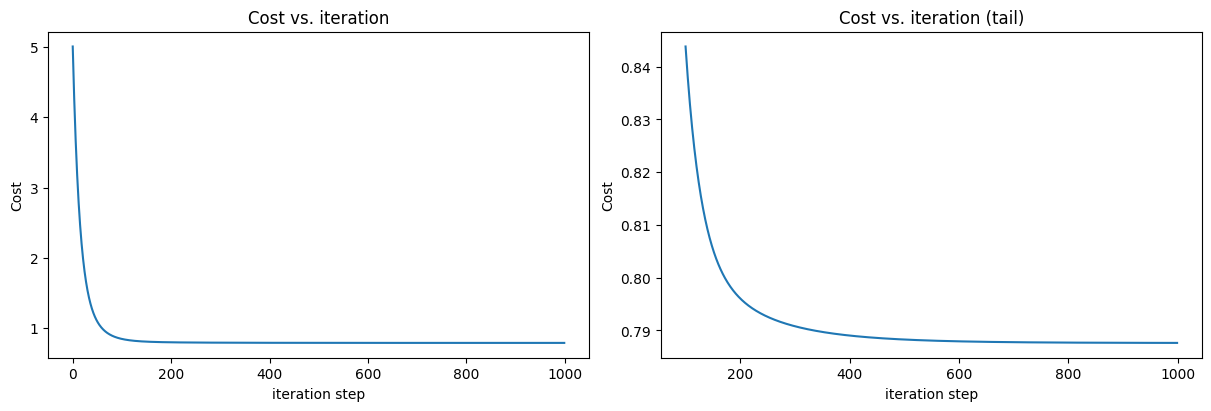

In [ ]:
# plot cost versus iteration  
fig, (ax1, ax2) = plt.subplots(1, 2, constrained_layout=True, figsize=(12, 4))
ax1.plot(J_hist)
ax2.plot(100 + np.arange(len(J_hist[100:])), J_hist[100:])
ax1.set_title("Cost vs. iteration");  ax2.set_title("Cost vs. iteration (tail)")
ax1.set_ylabel('Cost')             ;  ax2.set_ylabel('Cost') 
ax1.set_xlabel('iteration step')   ;  ax2.set_xlabel('iteration step') 
plt.show()

> What are the conclusions? (1-2 paragraphs)

*The cost have a big decrease at the beggining of the interactions until it reaches about 200 iteractions. Then we can see the line flatening until the end.*

4. (0.75 points) Use different learning rates when optimizing the model. You can use the model that you implemented or the model from scikit-learn.

> If you prefer to use the SGDRegressor from scikit-learn, use the parameter ```learning_rate='constant'``` and change the ```eta0```.

In [ ]:
# TODO: Different learning rates. You can use scikit-learn libraries.

In [ ]:
eta0_values = [0.01, 0.1, 1, 10]
for eta0 in eta0_values:
    sgd = SGDRegressor(learning_rate='constant', eta0=eta0)

    # Train the model on the training data
    sgd.fit(x_train_np, y_train_np)

    # Evaluate the model using cross-validation
    y_cv_pred = sgd.predict(x_cv_N.values)
    mse_cv = mse(y_cv_pred, y_cv.values.ravel(), "", False)
    print(f"Mean squared error for eta0={eta0} on cross-validation set: {mse_cv}")

    # Test the model on the testing data
    y_test_pred = sgd.predict(x_test_N.values)
    mse_test = mse(y_test_pred, y_test.values.ravel(), "", False)
    print(f"Mean squared error for eta0={eta0} on testing set: {mse_test}")

Mean squared error for eta0=0.01 on cross-validation set: 0.22033645844758645
Mean squared error for eta0=0.01 on testing set: 0.2423619423834983
Mean squared error for eta0=0.1 on cross-validation set: 0.6236116679723991
Mean squared error for eta0=0.1 on testing set: 0.8222715554825859
Mean squared error for eta0=1 on cross-validation set: 1.371371996118096e+24
Mean squared error for eta0=1 on testing set: 2.3116648199027413e+24
Mean squared error for eta0=10 on cross-validation set: 2.3315353574713517e+26
Mean squared error for eta0=10 on testing set: 2.5918131710928026e+26


> What are the conclusions? (1-2 paragraphs)

*It can be seen that for bigger values for `eta0` the bigger the value for MSE gets.*

5. (0.5 points) Sometimes, we need some more complex function to make good prediction. Evaluate a [Polynomial Linear Regression](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.PolynomialFeatures.html) model. 

In [ ]:
# TODO: Complex model. You can use scikit-learn libraries.

## *Training*

In [ ]:
poly = PolynomialFeatures(degree=2)

X_train_poly = poly.fit_transform(x_train_N.values)
print(X_train_poly.shape)
print(poly.get_params())
print(poly.get_feature_names_out())
X_cv_poly = poly.transform(x_test_N.values)
print(X_cv_poly.shape)
X_test_poly = poly.transform(x_test_N.values)
print(X_test_poly.shape)

(166, 45)
{'degree': 2, 'include_bias': True, 'interaction_only': False, 'order': 'C'}
['1' 'x0' 'x1' 'x2' 'x3' 'x4' 'x5' 'x6' 'x7' 'x0^2' 'x0 x1' 'x0 x2'
 'x0 x3' 'x0 x4' 'x0 x5' 'x0 x6' 'x0 x7' 'x1^2' 'x1 x2' 'x1 x3' 'x1 x4'
 'x1 x5' 'x1 x6' 'x1 x7' 'x2^2' 'x2 x3' 'x2 x4' 'x2 x5' 'x2 x6' 'x2 x7'
 'x3^2' 'x3 x4' 'x3 x5' 'x3 x6' 'x3 x7' 'x4^2' 'x4 x5' 'x4 x6' 'x4 x7'
 'x5^2' 'x5 x6' 'x5 x7' 'x6^2' 'x6 x7' 'x7^2']
(56, 45)
(56, 45)


In [ ]:
sgdr_P = SGDRegressor(max_iter=10000)
sgdr_P.fit(X_train_poly, y_train.values.ravel())
print(sgdr_P)
print(f"number of iterations completed: {sgdr_P.n_iter_}, number of weight updates: {sgdr_P.t_}")

SGDRegressor(max_iter=10000)
number of iterations completed: 23, number of weight updates: 3819.0


In [ ]:
b_norm_P = sgdr_P.intercept_
w_norm_P = sgdr_P.coef_
print(f"model parameters:                   w: {w_norm_P}, b:{b_norm_P}")

model parameters:                   w: [ 0.20212449  0.14269611  0.05942837  0.03093862 -0.06719629  0.1110393
  0.09108519  0.12638368  0.07574081  0.14269611  0.          0.12562793
 -0.34060873  0.04636924  0.09632687  0.06989586  0.07280025  0.05942837
 -0.09468931  0.27341244  0.06467006 -0.00524168  0.05648781  0.00294056
  0.1197949   0.02417428 -0.19601698  0.2269556   0.00929836  0.02164026
  0.19417721 -0.16128659  0.0940903  -0.0114074  -0.05578889  0.1110393
  0.          0.07053378  0.04050552  0.09108519  0.05584989  0.03523529
  0.12638368  0.          0.07574081], b:[0.20225082]


## *Cross-validation*

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgdr_P = sgdr_P.predict(X_cv_poly)
# make a prediction using w,b. 
y_pred_P = np.dot(X_cv_poly, w_norm_P) + b_norm_P  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred_P == y_pred_sgdr_P).all()}")

print(f"Prediction on training set:\n{y_pred_P[:100]}" )
print(f"Target values \n{y_cv.values.ravel()[:100]}")

mse(y_pred_P, y_cv.values.ravel(), "cross validation", True)

#scores = cross_val_score(sgdr_reg, X_train, y_train, cv=5, scoring='neg_mean_squared_error')
#print("MSE scores on training set: ", -scores)

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[0.91504639 1.12575273 4.09701964 2.37940125 2.03570772 0.92018219
 1.86881313 2.45737644 1.82780957 1.82135501 1.86851393 2.00738768
 2.52601946 1.00548423 1.1037115  1.53898229 1.3822127  1.2902386
 1.27114231 1.04128871 1.12412096 1.29040194 1.27167295 1.08392777
 1.67013275 0.97527769 1.22841786 1.91471228 1.23092165 1.62738561
 1.97669242 1.59291286 1.24112632 1.11475993 0.88968653 2.46133566
 0.77441702 1.89648742 1.17553884 2.63193809 1.33574224 1.89648742
 0.98823949 2.35148294 1.06693934 2.18632627 1.36456725 3.15147387
 3.30214354 0.97073618 2.03915034 7.9835698  0.99983032 1.35800637
 1.34304576 1.63099262]
Target values 
[1.7  1.2  1.   1.18 0.9  0.8  1.9  1.   1.2  1.1  1.2  0.8  1.3  0.5
 0.9  1.   0.9  0.9  1.   0.8  1.3  1.4  1.2  1.18 1.3  1.6  3.7  1.1
 1.4  1.3  0.8  1.18 1.83 0.8  1.83 1.3  2.1  2.3  0.9  1.2  2.1  0.75
 0.6  0.7  0.8  1.2  1.   1.   1.   1.   1.2  0.8  1.18 1.2  1.  

0.951332191402961

## *Testing*

In [ ]:
# make a prediction using sgdr.predict()
y_pred_sgdr_P = sgdr_P.predict(X_test_poly)
# make a prediction using w,b. 
y_pred_P = np.dot(X_test_poly, w_norm_P) + b_norm_P  
print(f"prediction using np.dot() and sgdr.predict match: {(y_pred_P == y_pred_sgdr_P).all()}")
print(f"Prediction on training set:\n{y_pred_P[:100]}" )
print(f"Target values \n{y_test.values.ravel()[:100]}")

mse(y_pred_P, y_test.values.ravel(), "test", True)

prediction using np.dot() and sgdr.predict match: True
Prediction on training set:
[0.91504639 1.12575273 4.09701964 2.37940125 2.03570772 0.92018219
 1.86881313 2.45737644 1.82780957 1.82135501 1.86851393 2.00738768
 2.52601946 1.00548423 1.1037115  1.53898229 1.3822127  1.2902386
 1.27114231 1.04128871 1.12412096 1.29040194 1.27167295 1.08392777
 1.67013275 0.97527769 1.22841786 1.91471228 1.23092165 1.62738561
 1.97669242 1.59291286 1.24112632 1.11475993 0.88968653 2.46133566
 0.77441702 1.89648742 1.17553884 2.63193809 1.33574224 1.89648742
 0.98823949 2.35148294 1.06693934 2.18632627 1.36456725 3.15147387
 3.30214354 0.97073618 2.03915034 7.9835698  0.99983032 1.35800637
 1.34304576 1.63099262]
Target values 
[1.   1.   1.18 3.   0.8  1.   1.7  1.1  1.2  0.9  1.2  1.6  1.1  1.
 0.9  1.2  1.1  0.8  1.83 1.   0.9  0.8  0.9  1.5  0.7  0.8  0.7  0.8
 0.7  1.83 1.83 1.6  1.18 1.6  1.1  2.   1.2  1.1  1.2  1.5  1.3  2.5
 0.9  0.7  0.9  0.6  0.9  0.9  1.9  1.3  1.1  1.8  1.   1.1  3.5  1

0.7167435295004758

> What are the conclusions? (1-2 paragraphs)

6. (0.5 points) Pick **your best model**, based on your validation set, and predict the target values for the test set.

*The best model are the sklearn version that isn't Polynomial Linear Regression model and that does not required the `learning_rate` and `eta0` to be changed. This model has a MSE value of 0.21478020443183102 for the test set.*

## Logistic Regression

This part of the assigment aims to predict the patients survival based on their medical records. 

*   Do we need to split the data into train, valid and test? How?
*   Do we need to normalize the data? How? The normalization is equal to train, valid and test split?
* **Target value: DEATH EVENT**.

In [ ]:
df_log.head(5)

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
0,75.0,No,582.0,No,20.0,1.0,265000.00,1.9,130.0,Female,No,1
1,55.0,No,7861.0,No,38.0,0.0,263358.03,1.1,136.0,Female,No,1
2,65.0,No,146.0,No,20.0,0.0,162000.00,1.3,129.0,Female,Yes,1
3,50.0,Yes,111.0,No,20.0,0.0,210000.00,1.9,137.0,Female,No,1
5,90.0,Yes,47.0,No,40.0,1.0,204000.00,2.1,132.0,Female,Yes,1


In [ ]:
df_log.describe(include = 'all')

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,DEATH_EVENT
count,277.000000,277,277.000000,277,277.000000,277.0,277.000000,277.000000,277.000000,277,277,277.0
unique,NaN,2,NaN,2,NaN,2.0,NaN,NaN,NaN,2,2,2.0
top,NaN,No,NaN,No,NaN,0.0,NaN,NaN,NaN,Female,No,0.0
freq,NaN,153,NaN,162,NaN,176.0,NaN,NaN,NaN,179,187,184.0
mean,60.979545,NaN,581.960289,NaN,38.054152,NaN,263354.998881,1.406751,136.646209,NaN,NaN,NaN
std,12.079913,NaN,988.979954,NaN,11.924610,NaN,94571.007935,1.063068,4.217514,NaN,NaN,NaN
min,40.000000,NaN,23.000000,NaN,15.000000,NaN,25100.000000,0.500000,113.000000,NaN,NaN,NaN
25%,50.000000,NaN,115.000000,NaN,30.000000,NaN,215000.000000,0.900000,134.000000,NaN,NaN,NaN
50%,60.000000,NaN,248.000000,NaN,38.000000,NaN,262000.000000,1.100000,137.000000,NaN,NaN,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303000.000000,1.400000,140.000000,NaN,NaN,NaN


In [ ]:
temp2 = df_log

target2 = ['DEATH_EVENT']
y = temp2[target2]
y['DEATH_EVENT'] = pd.Categorical(y.DEATH_EVENT)
temp3 = temp2[temp2.columns.difference(target2)]
temp3.describe(include = 'all')

<ipython-input-184-6a3a27a09bb0>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  y['DEATH_EVENT'] = pd.Categorical(y.DEATH_EVENT)


,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking
count,277.000000,277,277.000000,277,277.000000,277.0,277.000000,277.000000,277.000000,277,277
unique,NaN,2,NaN,2,NaN,2.0,NaN,NaN,NaN,2,2
top,NaN,No,NaN,No,NaN,0.0,NaN,NaN,NaN,Female,No
freq,NaN,153,NaN,162,NaN,176.0,NaN,NaN,NaN,179,187
mean,60.979545,NaN,581.960289,NaN,38.054152,NaN,263354.998881,1.406751,136.646209,NaN,NaN
std,12.079913,NaN,988.979954,NaN,11.924610,NaN,94571.007935,1.063068,4.217514,NaN,NaN
min,40.000000,NaN,23.000000,NaN,15.000000,NaN,25100.000000,0.500000,113.000000,NaN,NaN
25%,50.000000,NaN,115.000000,NaN,30.000000,NaN,215000.000000,0.900000,134.000000,NaN,NaN
50%,60.000000,NaN,248.000000,NaN,38.000000,NaN,262000.000000,1.100000,137.000000,NaN,NaN
75%,70.000000,NaN,582.000000,NaN,45.000000,NaN,303000.000000,1.400000,140.000000,NaN,NaN


In [ ]:
DataDummies_L = pd.get_dummies(temp3)
DataDummies_L
temp3 = DataDummies_L

In [ ]:
temp3.dtypes

age                         float64
creatinine_phosphokinase    float64
ejection_fraction           float64
platelets                   float64
serum_creatinine            float64
serum_sodium                float64
anaemia_No                    uint8
anaemia_Yes                   uint8
diabetes_No                   uint8
diabetes_Yes                  uint8
high_blood_pressure_0.0       uint8
high_blood_pressure_1.0       uint8
sex_Female                    uint8
sex_Male                      uint8
smoking_No                    uint8
smoking_Yes                   uint8
dtype: object

In [ ]:
x_Ltrain, x_LVT, y_Ltrain, y_LVT = train_test_split(temp3, y, test_size=0.40, random_state=1)

x_Lcv, x_Ltest, y_Lcv, y_Ltest = train_test_split(x_LVT, y_LVT, test_size=0.50, random_state=1)

print(f"the shape of the training set (input) is: {x_Ltrain.shape}")
print(f"the shape of the training set (target) is: {y_Ltrain.shape}\n")
print(f"the shape of the cross validation set (input) is: {x_Lcv.shape}")
print(f"the shape of the cross validation set (target) is: {y_Lcv.shape}\n")
print(f"the shape of the test set (input) is: {x_Ltest.shape}")
print(f"the shape of the test set (target) is: {y_Ltest.shape}")

the shape of the training set (input) is: (166, 16)
the shape of the training set (target) is: (166, 1)

the shape of the cross validation set (input) is: (55, 16)
the shape of the cross validation set (target) is: (55, 1)

the shape of the test set (input) is: (56, 16)
the shape of the test set (target) is: (56, 1)


*Yes, we need to split the data into train, cross validation and test. In this case the spliting were conducted by using 60% of the original dataset for the training, 20% for the cross validation, and 20% for testing using the method `train_test_split` from `scikit-learn`.*

In [ ]:
x_Ltrain.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_No,anaemia_Yes,diabetes_No,diabetes_Yes,high_blood_pressure_0.0,high_blood_pressure_1.0,sex_Female,sex_Male,smoking_No,smoking_Yes
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,60.479922,537.355422,37.861446,264508.411807,1.525241,137.048193,0.548193,0.451807,0.572289,0.427711,0.638554,0.361446,0.662651,0.337349,0.638554,0.361446
std,11.009971,862.758803,12.350393,94377.393525,1.290931,4.070302,0.499178,0.499178,0.496244,0.496244,0.481873,0.481873,0.474236,0.474236,0.481873,0.481873
min,40.000000,30.000000,15.000000,25100.000000,0.600000,124.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,52.000000,112.750000,30.000000,218000.000000,0.925000,135.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,60.000000,246.000000,36.500000,263358.030000,1.100000,137.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,68.750000,582.000000,45.000000,308750.000000,1.500000,140.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,95.000000,7861.000000,70.000000,621000.000000,9.400000,146.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
x_Ltrain.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_No,anaemia_Yes,diabetes_No,diabetes_Yes,high_blood_pressure_0.0,high_blood_pressure_1.0,sex_Female,sex_Male,smoking_No,smoking_Yes
61,50.0,318.0,40.0,216000.0,2.3,131.0,1,0,1,0,0,1,0,1,1,0
129,53.0,270.0,35.0,227000.0,3.4,145.0,0,1,0,1,1,0,1,0,1,0
175,60.0,95.0,60.0,337000.0,1.0,138.0,0,1,1,0,1,0,1,0,0,1
181,59.0,176.0,25.0,221000.0,1.0,136.0,0,1,0,1,1,0,1,0,0,1
172,70.0,171.0,60.0,176000.0,1.1,145.0,0,1,1,0,0,1,1,0,0,1


In [ ]:
from sklearn.preprocessing import MinMaxScaler

#train
# create a scaler object
scaler = MinMaxScaler()

# fit and transform the feature matrix
col = extractCol(x_Ltrain)

x_Ltrain.loc[:, col] = scaler.fit_transform(x_Ltrain[col])
x_Ltrain_scaled = x_Ltrain


x_Ltrain_scaled.head(5)

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_No,anaemia_Yes,diabetes_No,diabetes_Yes,high_blood_pressure_0.0,high_blood_pressure_1.0,sex_Female,sex_Male,smoking_No,smoking_Yes
61,0.181818,0.036777,0.454545,0.320356,0.193182,0.318182,1,0,1,0,0,1,0,1,1,0
129,0.236364,0.030647,0.363636,0.338815,0.318182,0.954545,0,1,0,1,1,0,1,0,1,0
175,0.363636,0.008300,0.818182,0.523410,0.045455,0.636364,0,1,1,0,1,0,1,0,0,1
181,0.345455,0.018644,0.181818,0.328746,0.045455,0.545455,0,1,0,1,1,0,1,0,0,1
172,0.545455,0.018005,0.818182,0.253230,0.056818,0.954545,0,1,1,0,0,1,1,0,0,1


In [ ]:
x_Ltrain_scaled.describe()

,age,creatinine_phosphokinase,ejection_fraction,platelets,serum_creatinine,serum_sodium,anaemia_No,anaemia_Yes,diabetes_No,diabetes_Yes,high_blood_pressure_0.0,high_blood_pressure_1.0,sex_Female,sex_Male,smoking_No,smoking_Yes
count,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000,166.000000
mean,0.372362,0.064788,0.415663,0.401759,0.105141,0.593100,0.548193,0.451807,0.572289,0.427711,0.638554,0.361446,0.662651,0.337349,0.638554,0.361446
std,0.200181,0.110172,0.224553,0.158378,0.146697,0.185014,0.499178,0.499178,0.496244,0.496244,0.481873,0.481873,0.474236,0.474236,0.481873,0.481873
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.218182,0.010567,0.272727,0.323712,0.036932,0.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.363636,0.027583,0.390909,0.399829,0.056818,0.590909,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000
75%,0.522727,0.070489,0.545455,0.476003,0.102273,0.727273,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
#cv

x_Lcv_scaled = x_Lcv
x_Lcv_scaled.loc[:, col] = scaler.fit_transform(x_Lcv_scaled[col])

In [ ]:
#test

x_Ltest_scaled = x_Ltest
x_Ltest_scaled.loc[:, col] = scaler.fit_transform(x_Ltest_scaled[col])

*Yes we need to normalize the data. Normalization should be applied separately to the train, validation, and test sets. It is important to calculate the normalization parameters (e.g., the minimum and maximum values for min-max scaling or the mean and standard deviation for z-score normalization that was used in this case throgh the `MinMaxScaler` method using only the training set, and then apply these same parameters to the validation and test sets. This helps to prevent information from the validation and test sets leaking into the training set, which can result in overfitting.*

1. (0.5 points) Verify if there is any feature that has low correlation with the target variables. You can use the function [mutual_info_classification](https://scikit-learn.org/stable/modules/generated/sklearn.feature_selection.mutual_info_classif.html) to check the importance of each feature.

In [ ]:
from sklearn.feature_selection import mutual_info_classif

# TODO: Feature selection
mutual_info = mutual_info_classif(x_Ltrain_scaled, y_Ltrain)

# Creating a dictionary with feature names and mutual information scores
mi_dict = {feature: mi_score for feature, mi_score in zip(x_Ltrain_scaled.columns, mutual_info)}

# Sorting the dictionary by mutual information scores in descending order
sorted_mi_dict = dict(sorted(mi_dict.items(), key=lambda item: item[1], reverse=True))

# Printing the mutual information scores for each feature from biggest to smallest
for feature, mi_score in sorted_mi_dict.items():
    print(f"{feature}: {mi_score}")

serum_creatinine: 0.07646189137332593
ejection_fraction: 0.0717811732108522
smoking_Yes: 0.05167511955965387
sex_Male: 0.047091711323923535
anaemia_Yes: 0.040855509636800624
sex_Female: 0.03465373150633422
serum_sodium: 0.023428157026464058
diabetes_No: 0.00018952436140429185
age: 0.0
creatinine_phosphokinase: 0.0
platelets: 0.0
anaemia_No: 0.0
diabetes_Yes: 0.0
high_blood_pressure_0.0: 0.0
high_blood_pressure_1.0: 0.0
smoking_No: 0.0


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> What are the conclusions? (1-2 paragraphs)

The mutual information scores indicate the importance of each feature in predicting the target variable. The feature 'serum_creatinine' has the highest score, followed by 'ejection_fraction' and 'age'. The other features have mutual information scores of 0, which means they have little or no predictive power in relation to the target variable.

This information is important because it can guide us in selecting the most relevant features to improve the model's performance. We may consider dropping the features with low mutual information scores as they are unlikely to contribute much to the prediction accuracy of the model. On the other hand, we may focus on the features with high mutual information scores and try to gather more data related to these features to improve the model's accuracy.

2. (2 points) Perform Multinomial Logistic Regression.

In [ ]:
# TODO: Logistic Regression. You can use scikit-learn libraries.

In [ ]:
from sklearn.linear_model import LogisticRegression

lr_model = LogisticRegression()
lr_model.fit(x_Ltrain_scaled, y_Ltrain)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


LogisticRegression()

In [ ]:
from sklearn.metrics import accuracy_score

# Evaluate the model on the validation set
y_cv_pred = lr_model.predict(x_Lcv_scaled)

print("Prediction on cross-validation set:", y_cv_pred)

accuracy = accuracy_score(y_Lcv, y_cv_pred)

print('Accuracy:', accuracy)

Prediction on cross-validation set: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 1 1 0 0 1 0 0 1 0 1 0 0
 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.8


In [ ]:
# Evaluate the model on the testing set
y_test_pred = lr_model.predict(x_Ltest_scaled)

print("Prediction on testing set:", y_test_pred)

accuracy = accuracy_score(y_Ltest, y_test_pred)

print('Accuracy:', accuracy)

Prediction on testing set: [1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1
 0 0 0 0 1 0 0 0 0 0 0 1 1 0 1 0 0 1 0]
Accuracy: 0.6964285714285714


> What are the conclusions? (1-2 paragraphs)


The logistic regression model trained on the training set achieved an accuracy of 0.8 on the cross-validation set, which indicates that the model is performing reasonably well on unseen data. However, when evaluated on the testing set, the accuracy drops to 0.6964, which is lower than the accuracy on the cross-validation set. This suggests that the model may be overfitting to the training set, and there is room for improvement in the model's generalization performance.

3. (1.5 points) Another factor that can alter the model result it's if the dataset is balanced:

*   The dataset is balanced ?
*   In this case, which technique is better: *oversampling* or *undersampling*?

Obs: You can use [RandomOverSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.over_sampling.RandomOverSampler.html) and [RandomUnderSampling](https://imbalanced-learn.org/stable/references/generated/imblearn.under_sampling.RandomUnderSampler.html#imblearn.under_sampling.RandomUnderSampler). But you can try others techniques.

In [ ]:
from sklearn.metrics import accuracy_score
from imblearn.over_sampling import RandomOverSampler

# create an instance of RandomOverSampler
ros = RandomOverSampler(random_state=1)

# fit and apply the random oversampler on the train set
X_train_oversampled, y_train_oversampled = ros.fit_resample(x_Ltrain, y_Ltrain)

# train a logistic regression model on the oversampled data
model = LogisticRegression(random_state=1)
model.fit(X_train_oversampled, y_train_oversampled)

# make predictions on the test set
y_predROS = model.predict(x_LVT)

print("Prediction on testing set using Random Over Sampler:", y_predROS)

# calculate accuracy score
accuracy = accuracy_score(y_LVT, y_predROS)

print('Accuracy:', accuracy)

/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Prediction on testing set using Random Over Sampler: [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]
Accuracy: 0.36936936936936937


In [ ]:
# TODO: Undersampling. You can use scikit-learn and imblearn libraries.
from imblearn.under_sampling import RandomUnderSampler

# create an instance of RandomUnderSampler
rus = RandomUnderSampler(random_state=1)

# fit and apply the random undersampler on the train set
X_train_undersampled, y_train_undersampled = rus.fit_resample(x_Ltrain, y_Ltrain)

# train a logistic regression model on the undersampled data
model = LogisticRegression(random_state=1)
model.fit(X_train_undersampled, y_train_undersampled)

# make predictions on the test set
y_predRUS = model.predict(x_LVT)

print("Prediction on testing set using Random Under Sampler:", y_predRUS)

# calculate accuracy score
accuracy = accuracy_score(y_LVT, y_predRUS)

print('Accuracy:', accuracy)

Prediction on testing set using Random Under Sampler: [0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
Accuracy: 0.6306306306306306


/usr/local/lib/python3.9/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


> What are the conclusions? (1-2 paragraphs)

The dataset is not balanced since there is a significant difference in the number of samples of each class. In this case, the accuracy score of the logistic regression model is low when using oversampling (0.369) and relatively high when using undersampling (0.631).

Undersampling is a better technique in this case since it helps to balance the dataset and reduce the bias towards the majority class. By removing samples from the majority class, the model can better learn to differentiate between the two classes. However, it is important to note that undersampling can also result in a loss of information if important samples are removed

4. (0.5 points) Pick **your best model** and plot the confusion matrix in the **test set**. 


/usr/local/lib/python3.9/dist-packages/sklearn/preprocessing/_label.py:116: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


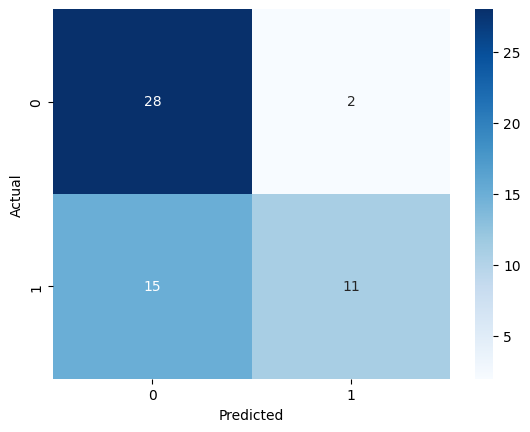

In [ ]:
# TODO: Plot the confusion matrix. You can use scikit-learn, seaborn, matplotlib libraries.
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import LabelEncoder

# convert y_Ltest to binary variable
le = LabelEncoder()
y_test_binary = le.fit_transform(y_Ltest)

# convert y_test_pred to binary variable
y_test_pred_binary = (y_test_pred > 0.5).astype(int)

# calculate confusion matrix
cm = confusion_matrix(y_test_binary, y_test_pred_binary)

# plot confusion matrix
sns.heatmap(cm, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()


In [ ]:
cm

array([[28,  2],
       [15, 11]])

> What are the conclusions? (1-2 paragraphs)

The confusion matrix shows the performance of the model in terms of correctly and incorrectly classified instances of each class. In this case, the model classified instances into two classes: patients with and without liver disease.

The confusion matrix reveals that out of the total of 56 instances in the test set, the model correctly classified 39 instances (28 true positives + 11 true negatives) and misclassified 17 instances (2 false positives + 15 false negatives). The model achieved a higher accuracy in predicting patients without liver disease (true negatives) compared to patients with liver disease (true positives), as the number of false negatives is greater than false positives. However, the overall accuracy of the model is moderate, indicating that there is still room for improvement in the model's performance.

## Deadline

Wednesday, April 19, 11:59 pm. 

Penalty policy for late submission: You are not encouraged to submit your assignment after due date. However, in case you do, your grade will be penalized as follows:
- April 20, 11:59 pm : grade * 0.75
- April 21, 11:59 pm : grade * 0.5
- April 22, 11:59 pm : grade * 0.25


## Submission

On Google Classroom, submit your Jupyter Notebook (in Portuguese or English).

**This activity is NOT individual, it must be done in pairs (two-person group).**